In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/3 INTROTOTENSORFLOW/INTROTONEURALNETWORKS INTROTOTENSORFLOW 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [ ]:
!pip install matplotlib==3.7.1
!pip install pandas==2.0.1
!pip install scikit-learn==1.6.1
!pip install imbalanced-learn==0.13.0
!pip install tensorflow==2.18.0
!pip install seaborn==0.12.2

In [8]:
!pip install tensorflow==2.18.0

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 MB 11.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 32.9 MB/s eta 0:00:00
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalle

    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  DEPRECATION: Configuring installation scheme with distutils config files is d

In [ ]:
#=================================================-
#### Slide 12: Load TensorFlow for Python  ####

# Import tensorflow.
import tensorflow as tf


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/3 INTROTOTENSORFLOW/INTROTONEURALNETWORKS INTROTOTENSORFLOW 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [22]:
#=================================================-
#### Slide 5: Loading packages  ####

import os
import pandas as pd
import matplotlib.pyplot as plt                     
import numpy as np
import math
import seaborn as sns
# Scikit-learn packages.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
# TensorFlow and supporting packages.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam




In [27]:
#=================================================-
#### Slide 6: Directory settings  ####

# Set 'main_dir' to location of the project folder
from pathlib import Path 
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)




/Users/elliotstern/Downloads/2025 Course Materials
/Users/elliotstern/Downloads/2025 Course Materials/data


In [28]:
#=================================================-
#### Slide 7: Load the data  ####


heart_disease = pd.read_csv(str(data_dir) + '/heart_disease_risk_BRFSS2015.csv')
print(heart_disease.head())




   HeartDiseaseorAttack  highbp  highchol  cholcheck  smokingstatus  stroke  \
0                     0       1         1          1              1       0   
1                     0       0         0          0              1       0   
2                     0       1         1          1              0       0   
3                     0       1         0          1              0       0   
4                     0       1         1          1              0       0   

   diabetes  physactivity  fruits  veggies  hvyalcoholconsump  anyhealthcare  \
0         0             0       0        1                  0              1   
1         0             1       0        0                  0              0   
2         0             0       1        0                  0              1   
3         0             1       1        1                  0              1   
4         0             1       1        1                  0              1   

   genhlth  diffwalk Sex_assigned_at_birth  

In [29]:
heart_disease.isnull().sum()

HeartDiseaseorAttack     0
highbp                   0
highchol                 0
cholcheck                0
smokingstatus            0
stroke                   0
diabetes                 0
physactivity             0
fruits                   0
veggies                  0
hvyalcoholconsump        0
anyhealthcare            0
genhlth                  0
diffwalk                 0
Sex_assigned_at_birth    0
age                      0
Education                0
dtype: int64

In [31]:
heart_disease['Sex_assigned_at_birth']

0         Female
1         Female
2         Female
3         Female
4         Female
           ...  
203060      Male
203061    Female
203062      Male
203063    Female
203064      Male
Name: Sex_assigned_at_birth, Length: 203065, dtype: object

In [33]:
pd.get_dummies(heart_disease['Sex_assigned_at_birth'], drop_first = True)

,Male
0,False
1,False
2,False
3,False
4,False
...,...
203060,True
203061,False
203062,True
203063,False


In [35]:
df = heart_disease

In [36]:
# Convert 'Sex_assigned_at_birth' into dummy variables.
sex_assigned_at_birth = pd.get_dummies(df['Sex_assigned_at_birth'], prefix = 'Sex_assigned_at_birth', drop_first = True)
    
# Convert 'Education' into dummy variables.
education = pd.get_dummies(df['Education'], prefix = 'education', drop_first = True)

In [37]:
education

,education_Grades 1-8,education_Grades 9-11,education_High school graduate,education_Never attended or only kindergarten,education_Some college/technical school
0,False,False,True,False,False
1,False,False,False,False,False
2,False,False,True,False,False
3,False,True,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
203060,False,True,False,False,False
203061,False,False,False,False,False
203062,True,False,False,False,False
203063,False,False,False,False,False


In [38]:
df = heart_disease
# Convert 'Sex_assigned_at_birth' into dummy variables.
sex_assigned_at_birth = pd.get_dummies(df['Sex_assigned_at_birth'], prefix = 'Sex_assigned_at_birth', drop_first = True)
    
# Convert 'Education' into dummy variables.
education = pd.get_dummies(df['Education'], prefix = 'education', drop_first = True)
   
# Drop `Sex_assigned_at_birth`, `Education` from the data.
df.drop(['Sex_assigned_at_birth', 'Education'], axis = 1, inplace = True)
    
# Concatenate `sex_assigned_at_birth`, `education` dummies to our dataset.
df = pd.concat([df, sex_assigned_at_birth, education], axis=1)
    
    # Separate predictors from data.
X = df.drop(['HeartDiseaseorAttack'], axis=1)
y = df['HeartDiseaseorAttack']

X

,highbp,highchol,cholcheck,smokingstatus,stroke,diabetes,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,genhlth,diffwalk,age,Sex_assigned_at_birth_Male,education_Grades 1-8,education_Grades 9-11,education_High school graduate,education_Never attended or only kindergarten,education_Some college/technical school
0,1,1,1,1,0,0,0,0,1,0,1,5,1,9,False,False,False,True,False,False
1,0,0,0,1,0,0,1,0,0,0,0,3,0,7,False,False,False,False,False,False
2,1,1,1,0,0,0,0,1,0,0,1,5,1,9,False,False,False,True,False,False
3,1,0,1,0,0,0,1,1,1,0,1,2,0,11,False,False,True,False,False,False
4,1,1,1,0,0,0,1,1,1,0,1,2,0,11,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203060,1,1,1,1,0,2,0,0,0,0,1,5,1,10,True,False,True,False,False,False
203061,0,0,1,0,0,0,0,1,1,0,1,2,0,7,False,False,False,False,False,False
203062,1,1,1,1,1,2,0,1,1,0,1,5,1,9,True,True,False,False,False,False
203063,1,0,1,1,0,2,0,1,1,0,1,5,1,11,False,False,False,False,False,False


In [5]:
#=================================================-
#### Slide 12: Data prep: convenience function (cont'd)  ####

def data_prep(df):
    
    # Convert 'Sex_assigned_at_birth' into dummy variables.
    sex_assigned_at_birth = pd.get_dummies(df['Sex_assigned_at_birth'], prefix = 'Sex_assigned_at_birth', drop_first = True)
    
    # Convert 'Education' into dummy variables.
    education = pd.get_dummies(df['Education'], prefix = 'education', drop_first = True)
   
    # Drop `Sex_assigned_at_birth`, `Education` from the data.
    df.drop(['Sex_assigned_at_birth', 'Education'], axis = 1, inplace = True)
    
    # Concatenate `sex_assigned_at_birth`, `education` dummies to our dataset.
    df = pd.concat([df, sex_assigned_at_birth, education], axis=1)
    
    # Separate predictors from data.
    X = df.drop(['HeartDiseaseorAttack'], axis=1)
    y = df['HeartDiseaseorAttack']

    # Set the seed to 1.
    np.random.seed(1)
    
    # Split data into train, test, and validation set, use a 70 - 15 - 15 split.
    # First split data into train-test with 70% for train and 30% for test.
    X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                        y,
                                                        test_size = .3,
                                                        random_state = 1)
    
    # Then split the test data into two halves: test and validation. 
    X_test, X_val, y_test, y_val = train_test_split(X_test,
                                                    y_test,
                                                    test_size = .5,
                                                    random_state = 1)
                                                    
    print("Train shape:", X_train.shape, "Test shape:", X_test.shape, "Val shape:", X_val.shape)
    
    # Transforms features by scaling each feature to a given range.
    # The default is the range between 0 and 1.
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train_scaled = min_max_scaler.fit_transform(X_train)
    X_test_scaled = min_max_scaler.transform(X_test)
    X_val_scaled = min_max_scaler.transform(X_val)
    
    return X_train_scaled, X_test_scaled, X_val_scaled, y_train, y_test, y_val




In [6]:
#=================================================-
#### Slide 13: Data prep  ####

X_train_scaled, X_test_scaled, X_val_scaled, y_train, y_test, y_val = data_prep(heart_disease)




Train shape: (142145, 20) Test shape: (30460, 20) Val shape: (30460, 20)


In [10]:
X_train_scaled

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [9]:
X_train_scaled.shape[1]

20

In [39]:
#=================================================-
#### Slide 17: Implement sequential model with dense layers  ####

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Set the seed so that results can be reproduced.
tf.random.set_seed(1)

# 20 neurons -> 32 neurons -> 20 neurons with a relu activation function. -> 1 neuron with a sigmoid activation

## Set up model.
model = Sequential([
  Dense(32,                                         #<- number of neurons for 1st hidden layer
        input_shape = (X_train_scaled.shape[1], )), #<- input layer shape: `(num_features, )`
  Dense(20,                                         #<- add 2nd hidden layer with 20 neurons
        activation = 'relu'), #<- set activation function for hidden layer
  Dense(1,                    #<- add output layer with single neuron 
       activation = 'sigmoid')#<- activation function for output layer       
])




regression- A continuous number such as housing price
classification- predicting a class (categories)


binary classification- 2 classes




In [40]:
#=================================================-
#### Slide 18: Compile the model  ####

# Compile the model.
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])




In [18]:
#=================================================-
#### Slide 19: Fit the model  ####

model_res = model.fit(X_train_scaled, y_train,                 #<- train data and labels
                      validation_data = (X_val_scaled, y_val), #<- pass val data
                      epochs = 30)                            #<- number of epochs




Epoch 1/30
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x3259e4ee0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x3259e4ee0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error:

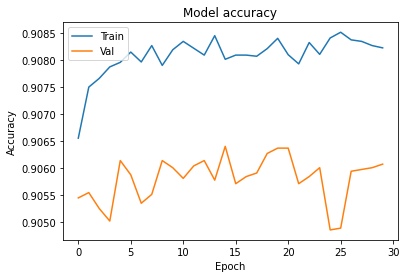

In [19]:
#=================================================-
#### Slide 22: Visualize training/validation accuracy for each epoch  ####

# Plot training & validation accuracy values
plt.plot(model_res.history['accuracy'])    #<- accuracy scores
plt.plot(model_res.history['val_accuracy'])#<- get val accuracy scores from dictionary
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()




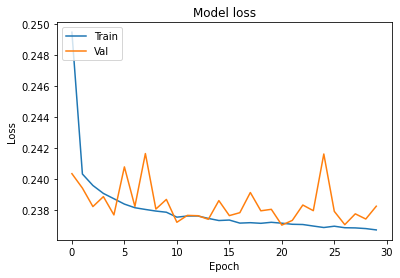

In [20]:
#=================================================-
#### Slide 23: Visualize training/validation loss for each epoch  ####

# Plot training & validation loss values
plt.plot(model_res.history['loss'])
plt.plot(model_res.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()




In [21]:
#=================================================-
#### Slide 24: Evaluate loss, accuracy on test data and predict  ####

loss, accuracy = model.evaluate(x = X_test_scaled, y = y_test)
print("Loss: {0:6.3f}, Accuracy: {1:6.3f}".format(loss, accuracy))
y_pred_prob = model.predict(X_test_scaled)
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print(y_pred)




952/952 [==============================] - 0s 397us/step - loss: 0.2415 - accuracy: 0.9059
Loss:  0.241, Accuracy:  0.906
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x3262fd790>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x3262fd790>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you a

In [ ]:
#=================================================-
#### Slide 26: Exercise  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################
